#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading data and nameing columns
dataset_df = pd.read_csv('/Users/sangaykhandu/Desktop/Semester 6/ITS307/data/imdb_top_10000.txt',sep='\t', names=['imdbID','title','year','score','votes',
                                              'runtime','genres'])

In [3]:
dataset_df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [4]:
dataset_df.shape

(10000, 7)

In [5]:
dataset_df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [6]:
dataset_df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [7]:
dataset_df.dropna(subset=['genres'],inplace=True)
dataset_df.shape

(9999, 7)

## 2. Asking Questions

In [8]:
#which movie got highest score at give year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [9]:
dataset_df.runtime[0].replace('mins.','')

'142 '

In [10]:
def get_runtime(time):
    runtime = time.replace('mins.','')
    return runtime

dataset_df['runtime'] = dataset_df.runtime.map(get_runtime)

In [11]:
dataset_df.runtime = dataset_df.runtime.astype('int')
dataset_df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [12]:
genre_set = set()
for genre in dataset_df.genres:
    genre_set.update(genre.split('|'))

In [13]:
len(genre_set)

24

In [14]:
for genre in genre_set:
    dataset_df[genre] = [genre in row.split('|') for row in dataset_df.genres]
    

In [15]:
dataset_df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Adventure  Horror  Music  ...  Adult  \
0                       Crime|Drama      False   False  False  ...  False   
1                    Crime|Thriller      False   False  False  ...  False   
2            Drama|Mystery|Thriller      False   False  False  ...  False   
3           Action|Adventure|Sci-Fi       True   False  False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller       True   False  False  ...  False   

   Animation   News  Drama  Crime  History  Film-Noir  Western  Mystery  \
0      False  False   True   True    False      False    False    False   
1      False  False  False   True    False      False    False    False   
2      False  False   True  False    False      False    False     True   
3      False  False  False  False    False      False    False    False   
4      False  False  False  False    False      False    False    False   

   Action  
0   False  
1   False  
2   False  
3    True  
4    True  

[5 rows x 31 columns]

In [22]:
dataset_df['title'] = [title[:-6] for title in dataset_df['title']]
dataset_df

imdbID                      title  year  score   votes  runtime  \
0     tt0111161  The Shawshank Redemption   1994    9.2  619479      142   
1     tt0110912              Pulp Fiction   1994    9.0  490065      154   
2     tt0137523                Fight Club   1999    8.8  458173      139   
3     tt0133093                The Matrix   1999    8.7  448114      136   
4     tt1375666                 Inception   2010    8.9  385149      148   
...         ...                        ...   ...    ...     ...      ...   
9995  tt0807721                   Meduzot   2007    7.0    1357       78   
9996  tt0339642            Daltry Calhoun   2005    5.2    1357      100   
9997  tt0060880    The Quiller Memorandum   1966    6.5    1356      104   
9998  tt0152836                      Taal   1999    6.5    1356      179   
9999  tt0279977            The Navigators   2001    6.9    1356       96   

                                genres  Adventure  Horror  Music  ...  Adult  \
0                          Crime|Drama      False   False  False  ...  False   
1                       Crime|Thriller      False   False  False  ...  False   
2               Drama|Mystery|Thriller      False   False  False  ...  False   
3              Action|Adventure|Sci-Fi       True   False  False  ...  False   
4     Action|Adventure|Sci-Fi|Thriller       True   False  False  ...  False   
...                                ...        ...     ...    ...  ...    ...   
9995                             Drama      False   False  False  ...  False   
9996        Comedy|Drama|Music|Romance      False   False   True  ...  False   
9997            Drama|Mystery|Thriller      False   False  False  ...  False   
9998                   Musical|Romance      False   False  False  ...  False   
9999                      Comedy|Drama      False   False  False  ...  False   

      Animation   News  Drama  Crime  History  Film-Noir  Western  Mystery  \
0         False  False   True   True    False      False    False    False   
1         False  False  False   True    False      False    False    False   
2         False  False   True  False    False      False    False     True   
3         False  False  False  False    False      False    False    False   
4         False  False  False  False    False      False    False    False   
...         ...    ...    ...    ...      ...        ...      ...      ...   
9995      False  False   True  False    False      False    False    False   
9996      False  False   True  False    False      False    False    False   
9997      False  False   True  False    False      False    False     True   
9998      False  False  False  False    False      False    False    False   
9999      False  False   True  False    False      False    False    False   

      Action  
0      False  
1      False  
2      False  
3       True  
4       True  
...      ...  
9995   False  
9996   False  
9997   False  
9998   False  
9999   False  

[9999 rows x 31 columns]

## 4. EDA

### 4.1 Univariate (One variable)

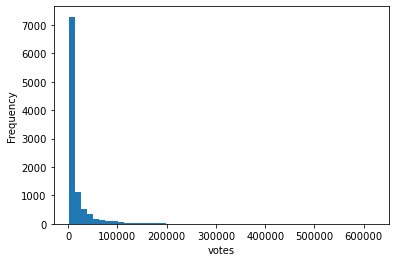

In [78]:
#choose some columns of your choice and plot histogram
%matplotlib inline
x = dataset_df.votes
plt.hist(x,bins=100)
plt.xlabel("votes")
plt.ylabel("Frequency")
plt.show()


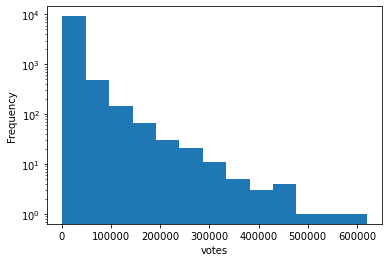

In [79]:
#choose some columns of your choice and plot histogram
%matplotlib inline
x = dataset_df.votes
plt.hist(x,bins=13,log=True)
plt.xlabel("votes")
plt.ylabel("Frequency")
plt.show()

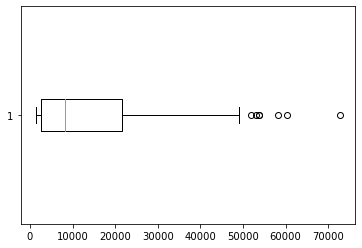

In [81]:
yeardf = dataset_df.groupby('year')
df2011 = yeardf.get_group(2011)
plt.boxplot(df2011.votes,vert=False)
plt.show()

 ### 4.2 Multivariate (Bivariate)

## 5. Determining Best Movies

In [72]:
grouped_by_year = dataset_df.groupby('year').max(['score','votes']).sort_values(['score','votes'],ascending=False)
grouped_by_year

score   votes  runtime  Adventure  Horror  Music   War  Fantasy  Sport  \
year                                                                           
1994    9.2  619479      450       True    True   True  True     True   True   
1972    9.2  474189      235       True    True   True  True     True   True   
1974    9.0  291169      200       True    True   True  True     True   True   
1975    9.0  255503      188       True    True   True  True     True   True   
1966    9.0  195238      182       True    True  False  True     True   True   
...     ...     ...      ...        ...     ...    ...   ...      ...    ...   
1953    8.3   36760      136       True    True   True  True     True  False   
1955    8.3   30491      181       True    True   True  True     True  False   
1969    8.2   66419      158       True    True   True  True     True   True   
1956    8.2   32502      220       True    True   True  True     True   True   
1970    8.1   44788      172       True    True   True  True     True  False   

      Family  ...  Adult  Animation   News  Drama  Crime  History  Film-Noir  \
year          ...                                                              
1994    True  ...  False       True  False   True   True     True      False   
1972    True  ...   True       True  False   True   True     True      False   
1974    True  ...  False      False  False   True   True     True      False   
1975    True  ...  False       True  False   True   True     True      False   
1966    True  ...  False      False  False   True   True     True      False   
...      ...  ...    ...        ...    ...    ...    ...      ...        ...   
1953    True  ...  False       True  False   True   True     True       True   
1955    True  ...  False       True  False   True   True     True       True   
1969    True  ...  False       True  False   True   True     True      False   
1956    True  ...  False      False  False   True   True     True       True   
1970    True  ...  False       True  False   True   True     True      False   

      Western  Mystery  Action  
year                            
1994     True     True    True  
1972     True     True    True  
1974     True     True    True  
1975     True     True    True  
1966     True     True    True  
...       ...      ...     ...  
1953     True     True    True  
1955     True     True    True  
1969     True     True    True  
1956     True     True    True  
1970     True     True    True  

[62 rows x 27 columns]

## 6. Trends in Popularity of Genres

In [17]:
genredf = dataset_df[list(genre_set)]
genredf.head()

Adventure  Horror  Music    War  Fantasy  Sport  Family  Comedy  Romance  \
0      False   False  False  False    False  False   False   False    False   
1      False   False  False  False    False  False   False   False    False   
2      False   False  False  False    False  False   False   False    False   
3       True   False  False  False    False  False   False   False    False   
4       True   False  False  False    False  False   False   False    False   

   Biography  ...  Adult  Animation   News  Drama  Crime  History  Film-Noir  \
0      False  ...  False      False  False   True   True    False      False   
1      False  ...  False      False  False  False   True    False      False   
2      False  ...  False      False  False   True  False    False      False   
3      False  ...  False      False  False  False  False    False      False   
4      False  ...  False      False  False  False  False    False      False   

   Western  Mystery  Action  
0    False    False   False  
1    False    False   False  
2    False     True   False  
3    False    False    True  
4    False    False    True  

[5 rows x 24 columns]

In [18]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index
genre_result

Adventure     1313
Horror        1215
Music          371
War            512
Fantasy        916
Sport          288
Family         754
Comedy        3922
Romance       2441
Biography      394
Musical        260
Reality-TV       1
Thriller      2832
Sci-Fi         897
Adult            9
Animation      314
News             1
Drama         5697
Crime         1867
History        358
Film-Noir       40
Western        235
Mystery       1009
Action        1891
dtype: int64

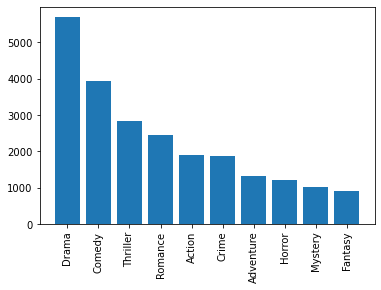

In [19]:
plt.bar(x,y)
#rotate the x 
plt.xticks(rotation=90)
plt.show()